# Lab 3

### Team Members:
 - Alex Lopez
 - Chris Haub
 - Erin McClure-Price
 - Chad Kwong

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import plotly.express as px #EMP used for some outlier stuff
from scipy import stats #EMP used for some outlier stuff
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import k_means


# Setting Random State for replicability
randomState = 777

#### Data Import

In [2]:
%%time

#Loading all data file separately 
vle = pd.read_csv('./anonymiseddata/vle.csv')
assessments = pd.read_csv('./anonymiseddata/assessments.csv')
courses = pd.read_csv('./anonymiseddata/courses.csv')
studentAssessments = pd.read_csv('./anonymiseddata/studentAssessment.csv')
studentInfo = pd.read_csv('./anonymiseddata/studentInfo.csv')
studentRegistration = pd.read_csv('./anonymiseddata/studentRegistration.csv')
studentVle = pd.read_csv('./anonymiseddata/studentVle.csv')

CPU times: user 3.57 s, sys: 633 ms, total: 4.2 s
Wall time: 4.27 s


# Business Understanding 1 #
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?*

For Lab 3 we chose to use the "Open University Learning Analytics Dataset" (OULAD) which is an anonymized collection of information acquired from online students who were enrolled in the Open University (Milton Keynes, England) in 2013-2014. The data includes student demographic and registration information, as well as assessment results and interactions with the Virtual Learning Environment (VLE). There are multiple ways that the OULAD can be utilized, including prediction of grade results, better understanding of the factors that influence online student outcomes, or to compare online student results to in-person student results. The reason why this dataset is important is because it can be used by educators and universities to increase student success within an online learning environment. 

Our goal for Lab 3 was to explore the OULAD using K-Means clustering in order to find trends and insight into student learning styles. We chose K-Means clustering because it is an unsupervised algorithm that is straightforward to carry out, scalable, and can be used for large datasets. We chose to evaluate the clustering model using the **Dunn Index..?**, which calculates the closest distance between two clusters divided by the largest distance between two clusers. The Dunn Index has a range of 0 to 1, wherein the closer the value is to 1 the better the clustering. We felt that the Dunn Index was ideal because it provides a numeric value to the fitness of a cluster rather than through visual analysis.


##### References
[Kaggle: OULAD](https://www.kaggle.com/datasets/rocki37/open-university-learning-analytics-dataset)

[K-Means Clustering and Dunn Index Implementaion 
From Scratch]( https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)

[Dunn Index for K-Means Clustering Evaluation](https://python-bloggers.com/2022/03/dunn-index-for-k-means-clustering-evaluation/)

[A Simple Explanation of K-Means Clustering](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

# Data Understanding 1 #
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?*

### Data Description

The OULAD dataset is derived from a relational database schema, and contains seven CSV files that encompasses data collected from 32,593 students that were enrolled in 22 courses. There are a total of 43 variables and over **X** million instances. The CSV files and their contents are described below, information regarding each variable was taken from [HERE](https://analyse.kmi.open.ac.uk/open_dataset). It should be noted that "modules" refer to university courses and VLE refers to "virtual learning environment".

#### Courses:
* code_module **(categorical)** - code for the module, which serves as the identifier
* code_presentation  **(categorical)**– code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* length **(numeric)** - length of the module-presentation in days.

#### Assessments
* code_module **(categorical)** – identification code of the module, to which the assessment belongs.
* code_presentation **(categorical)** - identification code of the presentation, to which the assessment belongs.
* id_assessment **(numeric)** – identification number of the assessment.
* assessment_type **(categorical)** – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
* date **(numeric)** – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
* weight **(numeric)** - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

#### VLE
* id_site **(numeric)** – an identification number of the material.
* code_module **(categorical)** – an identification code for module.
* code_presentation **(categorical)** - the identification code of presentation.
* activity_type **(categorical)** – the role associated with the module material.
* week_from **(numeric)** – the week from which the material is planned to be used.
* week_to **(numeric)** – week until which the material is planned to be used.;

#### StudentInfo
* code_module **(categorical)** – an identification code for a module on which the student is registered.
* code_presentation **(categorical)** - the identification code of the presentation during which the student is registered on the module.
* id_student **(numeric)** – a unique identification number for the student.
* gender **(categorical)** – the student’s gender.
* region **(categorical)** – identifies the geographic region, where the student lived while taking the module-presentation.
* highest_education **(categorical)** – highest student education level on entry to the module presentation.
* imd_band **(categorical)** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* age_band **(numeric)** – band of the student’s age.
* num_of_prev_attempts **(numeric)** – the number times the student has attempted this module.
* studied_credits **(numeric)** – the total number of credits for the modules the student is currently studying.
* disability **(categorical)**  – indicates whether the student has declared a disability.
* final_result **(categorical)** – student’s final result in the module-presentation.

#### StudentRegistragion
* code_module **(categorical)** – an identification code for a module.
* code_presentation **(categorical)** - the identification code of the presentation.
* id_student **(numeric)** – a unique identification number for the student.
* date_registration **(numeric)** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* date_unregistration **(numeric)** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

#### StudentAssessment
* id_assessment **(numeric)** – the identification number of the assessment.
* id_student **(numeric)** – a unique identification number for the student.
* date_submitted **(numeric)** – the date of student submission, measured as the number of days since the start of the module presentation.
* is_banked **(numeric)** – a status flag indicating that the assessment result has been transferred from a previous presentation.
* score **(numeric)** – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

#### StudentVLE
* code_module **(categorical)** – an identification code for a module.
* code_presentation **(categorical)** - the identification code of the module presentation.
* id_student **(numeric)** – a unique identification number for the student.
* id_site **(numeric)** - an identification number for the VLE material.
* date **(numeric)** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* sum_click **(numeric)** – the number of times a student interacts with the material in that day.



We found that using all of the 32000 students was too intensive, so we sampled 750 random students to bring down the size of the dataset. The dataset was originally used in a relational database schema with separated tables, hence the seven CSV files. In order to create a clustering model, we needed to merge these tables together into a singular dataframe. The resulting dataset had over **x million instances** encompassing data from 32,593 students and we found that our machines were bogged down by the size, making it necessary to take a random sample of 25 students for a total of 42,714 transactions. 

we need to convert date_registration, date_y, score to int, and then convert num_of_prev_attempts, studied_credits, is_banked, module_presentation_length to object

In [3]:
%%time
# Randomly sampling 40 students to generate dataset
studentSample = studentInfo.sample(n=25, random_state = randomState)
print(studentSample.shape)

# vle
# assessments X
# courses X
# studentAssessments X
# studentInfo X
# studentRegistration X
# studentVleSample X

# compiling dataframe from data files
df = pd.merge(studentSample, studentVle, on=['code_module', 'code_presentation', 'id_student'])
df2 = pd.merge(studentAssessments, assessments, on='id_assessment')
df = pd.merge(df, df2, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = pd.merge(df, courses, on= ['code_module', 'code_presentation'], how='left')
df = pd.merge(df, studentRegistration, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = pd.merge(df, vle, on=['id_site', 'code_module', 'code_presentation'], how='left')

print(df.shape)
df.head()

(25, 12)
(42714, 28)
CPU times: user 1.53 s, sys: 450 ms, total: 1.98 s
Wall time: 2.16 s


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,score,assessment_type,date_y,weight,module_presentation_length,date_registration,date_unregistration,activity_type,week_from,week_to
0,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,homepage,NaN,NaN
1,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,resource,NaN,NaN
2,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,forumng,NaN,NaN
3,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,forumng,NaN,NaN
4,CCC,2014J,134190,F,Scotland,A Level or Equivalent,30-40%,0-35,0,120,...,78.0,CMA,18.0,2.0,269,-70.0,32.0,homepage,NaN,NaN


### Missing Values

From the cell below, we saw that date_unregistration had null entries in over 96% of the data, and both week_from and week_to had null entries for over 86% of the data. Since these columns seemed to be unnecessary, we chose to drop all three as they consisted mostly of missing values. These columns could be used to analyze the population of the data that are not registered. **I don't understand this last sentence**

Running the same code on the dataset after dropping the three columns showed that the percentages of missing values in the remaining columns were less than 5%.

In [4]:
print('Missing values: \n', df.isnull().sum() * 100 / len(df),'\n\n')
missingValues = df[df.isnull()]
try:
    df = df.drop(columns = ['week_from', 'week_to', 'date_unregistration'])
except:
    print('These columns have already been dropped\n\n')
print('Missing values after dopping columns: \n', df.isnull().sum() * 100 / len(df))

Missing values: 
 code_module                    0.000000
code_presentation              0.000000
id_student                     0.000000
gender                         0.000000
region                         0.000000
highest_education              0.000000
imd_band                       0.000000
age_band                       0.000000
num_of_prev_attempts           0.000000
studied_credits                0.000000
disability                     0.000000
final_result                   0.000000
id_site                        0.000000
date_x                         0.000000
sum_click                      0.000000
id_assessment                  0.000000
date_submitted                 0.000000
is_banked                      0.000000
score                          0.000000
assessment_type                0.000000
date_y                         3.703704
weight                         0.000000
module_presentation_length     0.000000
date_registration              0.000000
date_unregistration   

In [5]:
df.dropna(inplace=True)
try:
    df.drop(columns=['id_student','id_assessment','id_site','code_module','code_presentation'],inplace=True)
except:
    print("These columns have already been dropped")
    
#converting variables to their correct type
df.date_registration = df['date_registration'].astype(int)
df.date_y = df['date_y'].astype(int)
df.score = df['score'].astype(int)
df.num_of_prev_attempts = df['num_of_prev_attempts'].astype(object)
df.studied_credits = df['studied_credits'].astype(object)
df.is_banked = df['is_banked'].astype(object)
df.module_presentation_length = df['module_presentation_length'].astype(object)

df.shape

(41132, 20)

We converted Date_registration, date_y, and score to int values since there are no counts of values with decimals. We also converted num_of_prev_attempts, studied_credits, is_banked, and module_presentation_length to objects.

### One Hot Encoding

As shown in the code output below, many of the variables in the OULAD were categorical making it necessary to One Hot Encode the data in order to analyze it.

In [6]:
df.dtypes

gender                         object
region                         object
highest_education              object
imd_band                       object
age_band                       object
num_of_prev_attempts           object
studied_credits                object
disability                     object
final_result                   object
date_x                          int64
sum_click                       int64
date_submitted                  int64
is_banked                      object
score                           int64
assessment_type                object
date_y                          int64
weight                        float64
module_presentation_length     object
date_registration               int64
activity_type                  object
dtype: object

In [7]:
# View unique values in each column
# for col in df:
#   print(df[col].unique())

In [8]:
#Creating variables for indexing continuous and categorical variables
conCol = ['date_x', 'sum_click', 'date_submitted', 'score', 'date_y', 'weight']

catCol = ['gender', 'region', 'highest_education', 'is_banked',  'num_of_prev_attempts', 'studied_credits',
          'imd_band', 'age_band', 'disability', 'final_result', 'assessment_type', 'module_presentation_length']

In [9]:
%%time
#Declaring Scalar object
scl_obj = StandardScaler()
#scl_obj = RobustScaler()

#One hot encoding of ALL categorical variables
OneHotDF = pd.get_dummies(df[catCol],drop_first=False)

#Scaling non-encoded data
conVar = df.select_dtypes(exclude='object')
colnames = pd.Series(conVar.columns)
conVarScaled = scl_obj.fit_transform(conVar)
conVarScaled = pd.DataFrame(data = conVarScaled, columns= colnames)

#Combining with continuous variables from cleaned dataset
OneHotDF = OneHotDF.reset_index()
OneHotDF.pop('index')
OneHotDF = pd.concat([conVarScaled,OneHotDF], axis = 1)
OneHotDF.head()

#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb


CPU times: user 69.2 ms, sys: 11.5 ms, total: 80.7 ms
Wall time: 81.3 ms


,date_x,sum_click,date_submitted,score,date_y,weight,date_registration,gender_F,gender_M,region_East Anglian Region,...,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA,module_presentation_length_234,module_presentation_length_240,module_presentation_length_241,module_presentation_length_261,module_presentation_length_262,module_presentation_length_268,module_presentation_length_269
0,-1.599375,-0.400641,-1.452593,-0.120758,-1.500053,-0.72337,-0.633675,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,-1.599375,-0.400641,-1.452593,-0.120758,-1.500053,-0.72337,-0.633675,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,-1.366528,-0.400641,-1.452593,-0.120758,-1.500053,-0.72337,-0.633675,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,-1.366528,-0.236085,-1.452593,-0.120758,-1.500053,-0.72337,-0.633675,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,-1.366528,0.422141,-1.452593,-0.120758,-1.500053,-0.72337,-0.633675,1,0,0,...,1,0,0,0,0,0,0,0,0,1


### Outliers

Once the OULAD was entirely numeric, we could look through the data for outliers. The code below was used to calculate the 25th and 75th quantiles from the data and then report the columns that had values outside of the interquantile range (IQR). 

In [10]:
Q1 = OneHotDF[conCol].quantile(0.25)
Q3 = OneHotDF[conCol].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

IQRDF = pd.DataFrame(data = {'Q1':Q1, 'Q3':Q3, 'IQR':IQR})
IQRDF.index.name = 'Variable Name'
IQRDF['lowerGate'] = Q1-1.5*IQR
IQRDF['upperGate'] = Q3+1.5*IQR
IQRDF.sort_values(by='IQR', ascending=False)

,Q1,Q3,IQR,lowerGate,upperGate
Variable Name,,,,,
date_y,-0.944869,1.030557,1.975425,-3.908006,3.993694
date_x,-0.965512,0.819652,1.785165,-3.643259,3.497399
date_submitted,-0.940700,0.745534,1.686235,-3.470052,3.274887
weight,-0.842636,0.469290,1.311927,-2.810526,2.437180
score,-0.461839,0.788788,1.250627,-2.337779,2.664729
sum_click,-0.400641,-0.071528,0.329113,-0.894310,0.422141


The code below was used to check for rows that were outside the range of the lower and upper bounds. 

In [11]:
print(df[conCol].describe())

for i in range(0,len(IQRDF.index)):
    lowerCount = len((OneHotDF[OneHotDF[IQRDF.index[i]] < IQRDF.lowerGate[i]]))
    upperCount = len((OneHotDF[OneHotDF[IQRDF.index[i]] > IQRDF.upperGate[i]]))

    if ((lowerCount !=0) & (upperCount !=0)):
        print('The number of outliers outside the lower and upper gates for the '+ 
              IQRDF.index[i] + ' variable is', lowerCount + upperCount)
    else:
        print('There are no outliers for the ' + IQRDF.index[i] + ' variable.')

             date_x     sum_click  date_submitted         score        date_y  \
count  41132.000000  41132.000000    41132.000000  41132.000000  41132.000000   
mean     107.637776      3.434674      117.481474     80.124283    134.181659   
std       77.304738      6.077017       66.420978     17.591390     77.452623   
min      -18.000000      1.000000       12.000000     10.000000     12.000000   
25%       33.000000      1.000000       55.000000     72.000000     61.000000   
50%      114.000000      1.000000      123.000000     83.000000    131.000000   
75%      171.000000      3.000000      167.000000     94.000000    214.000000   
max      268.000000     98.000000      241.000000    100.000000    261.000000   

             weight  
count  41132.000000  
mean      14.130361  
std       16.769435  
min        0.000000  
25%        0.000000  
50%       10.000000  
75%       22.000000  
max      100.000000  
There are no outliers for the date_x variable.
There are no outliers for

According to the results printed above, there were no significant outliers within the dataset. 

In [12]:
#looks like we don't need this, right? -emp
#remove outliers maybe?
ohdf = OneHotDF
print('shape before removing outliers:',ohdf.shape)
ohdf = ohdf[~((ohdf < (Q1 - 1.5 * IQR)) |(ohdf > (Q3 + 1.5 * IQR))).any(axis=1)]
print('shape after removing outliers:',ohdf.shape)
ohdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33076 entries, 0 to 39750
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   date_x                                   33076 non-null  float64
 1   sum_click                                33076 non-null  float64
 2   date_submitted                           33076 non-null  float64
 3   score                                    33076 non-null  float64
 4   date_y                                   33076 non-null  float64
 5   weight                                   33076 non-null  float64
 6   date_registration                        33076 non-null  float64
 7   gender_F                                 33076 non-null  uint8  
 8   gender_M                                 33076 non-null  uint8  
 9   region_East Anglian Region               33076 non-null  uint8  
 10  region_London Region                     33076

<ipython-input-12-c9df8b9001b9>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ohdf = ohdf[~((ohdf < (Q1 - 1.5 * IQR)) |(ohdf > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-12-c9df8b9001b9>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ohdf = ohdf[~((ohdf < (Q1 - 1.5 * IQR)) |(ohdf > (Q3 + 1.5 * IQR))).any(axis=1)]


# Data Understanding 2 #
*Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.*

We wanted to check the relationships of some of the variables, so we created two functions in the cell below. 

The first function creates a stacked boxplot of a categorical variable compared to "Final_Result" (AKA: final grade at the end of the course) as well as outputs the counts of each categorical level per final_result level.

The second function was used to create a series of box plots and histograms for the continuous variables, this was done so that we could check for outliers and distributions. A triangle symbol in the box plots indicates the mean value.

In [13]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['final_result'],margins=True)
    print(tab1)
    print('-'*100)
    tab = pd.crosstab(x,df['final_result'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
    plt.show()
    
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

The first variable we looked at was "gender", we found that the distribution of between males and females for each level of final_result was almost equal.

final_result  Distinction  Fail   Pass  Withdrawn    All
gender                                                  
F                       0  3651   4102       1467   9220
M                    9396  1542  20794        180  31912
All                  9396  5193  24896       1647  41132
----------------------------------------------------------------------------------------------------


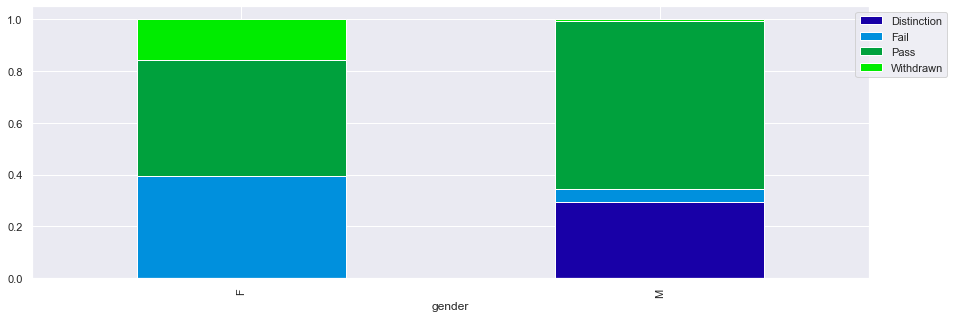

In [14]:
stacked_plot(df["gender"])

The variable for "region" showeded significantly more "final_result: Distinction" results occurring in Wales followed by London Region and Wouth West Region. Most failing grades appeared to occur in the Yorkshire region, followed by Ireland and the South East Region. There were notably few Distinction and no Withdrawn results in the North Region, though this could be because those results were not listed in the files and we chose to drop many instances from the North Region.

Overall, the majority of students across the "Region" variable passed their courses.

final_result          Distinction  Fail   Pass  Withdrawn    All
region                                                          
East Anglian Region             0  2162      0          0   2162
London Region                   0  1380      0          0   1380
North Western Region         1644     0      0       1355   2999
Scotland                        0     0   1240        264   1504
South East Region            7752     0  17533          0  25285
South Region                    0    22   3929          0   3951
South West Region               0     0      0         28     28
West Midlands Region            0   162    882          0   1044
Yorkshire Region                0  1467   1312          0   2779
All                          9396  5193  24896       1647  41132
----------------------------------------------------------------------------------------------------


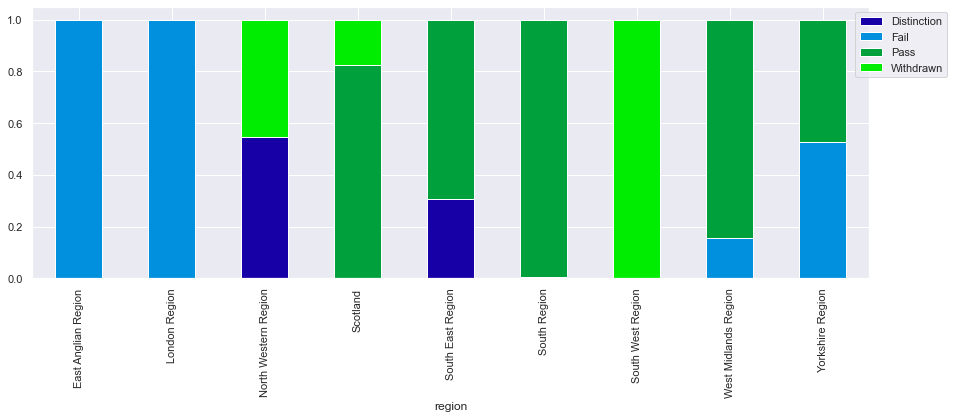

In [15]:
stacked_plot(df["region"])

The results for "imd_band" (Indices of Multiple Deprivation - a measure of poverty where lower percentages indicate increased poverty) showed that the lower IMD bands had fewer Distinction level entries and increased Fail level entries. Interestingly, the 60-70% IMD band also had a high number of Fail entries. However, the majority of students across all IMD bands passed their courses, showing that IMD was not a major indicator of success. 

final_result  Distinction  Fail   Pass  Withdrawn    All
imd_band                                                
0-10%                   0     0    882          0    882
10-20                   0  1467      0       1355   2822
30-40%                  0     0      0        264    264
40-50%                  0     0   5999         28   6027
50-60%                  0  1380      0          0   1380
60-70%                  0    22  12846          0  12868
70-80%               1644  2184   1804          0   5632
80-90%               7752   140   3365          0  11257
All                  9396  5193  24896       1647  41132
----------------------------------------------------------------------------------------------------


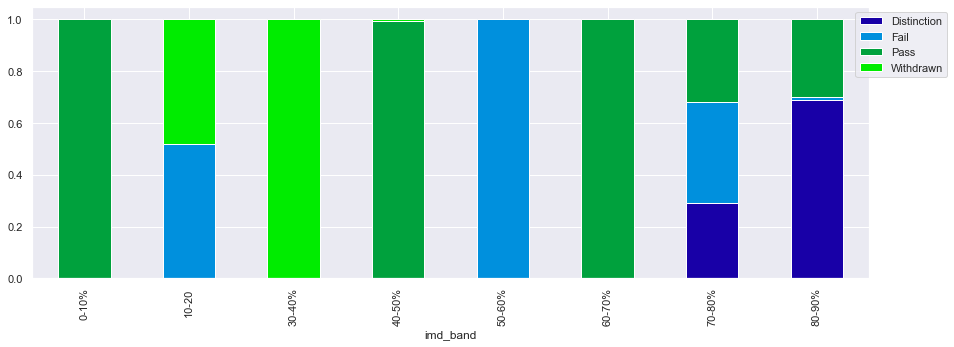

In [16]:
stacked_plot(df["imd_band"])

When comparing ages of students vs final_result, we found that there were no Fails, Withdrawals, or Distinctions for the 55+ age band. The majority of Distinction, Withdraw, and Fail results occurred for the 0-35 age band, but Passing grades were in the majority for both the 0-35 and 35-55 bands.

final_result  Distinction  Fail   Pass  Withdrawn    All
age_band                                                
0-35                 9396  1791  12619       1495  25301
35-55                   0  3402  12277        152  15831
All                  9396  5193  24896       1647  41132
----------------------------------------------------------------------------------------------------


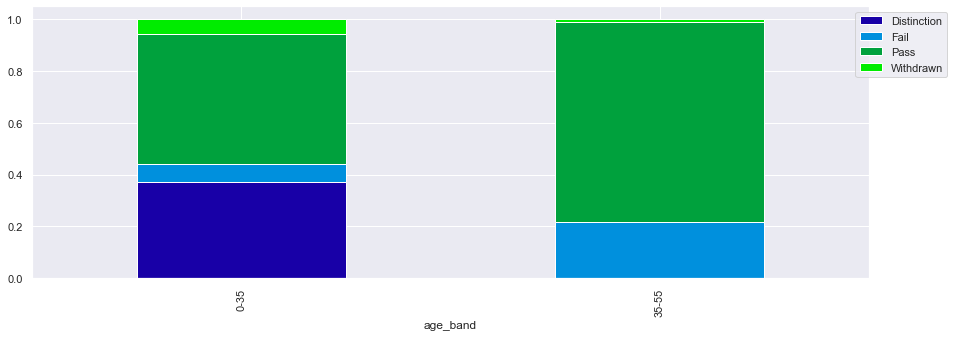

In [17]:
stacked_plot(df["age_band"])

For the assessment types, the levels were CMA (Computer Marked Assessment), TMA (Tutor Marked Assessment), and traditional Exam.

Interestingly, there were no Fail or Distinction results for the Exam level, while the CMA had the most Distinctions and the TMA had the most Passing results. Withdrawals were only noted in the CMA and TMA assessments.

final_result     Distinction  Fail   Pass  Withdrawn    All
assessment_type                                            
CMA                     3876  2260   7454       1571  15161
Exam                       0     0    970          0    970
TMA                     5520  2933  16472         76  25001
All                     9396  5193  24896       1647  41132
----------------------------------------------------------------------------------------------------


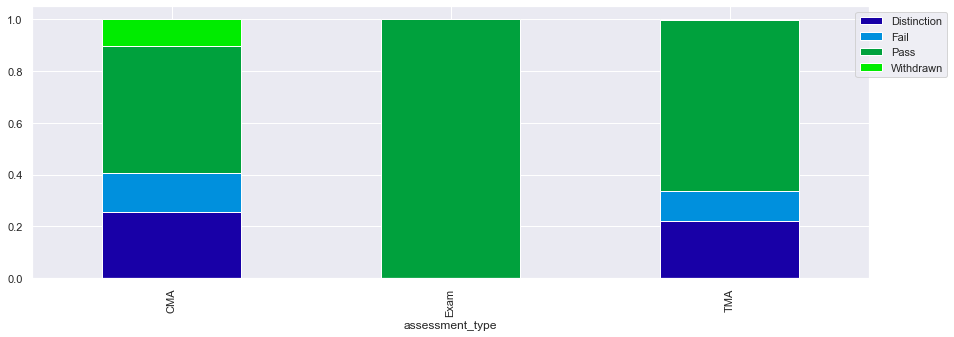

In [18]:
stacked_plot(df["assessment_type"])


For the continous variables, we chose to use box plots and histograms. The commented-out code below produces a loop that we used to review all of the continous variables, but we chose to focus on those variables that we had found outliers in.

In [19]:
#for i in conCol:
    #histogram_boxplot(ohdf[i])

The distribution of the "sum_click" (the number of times a student interacts with the online material in a day) showed a few outliers from students who accessed their online courses more frequently and a right skewed distribution.

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


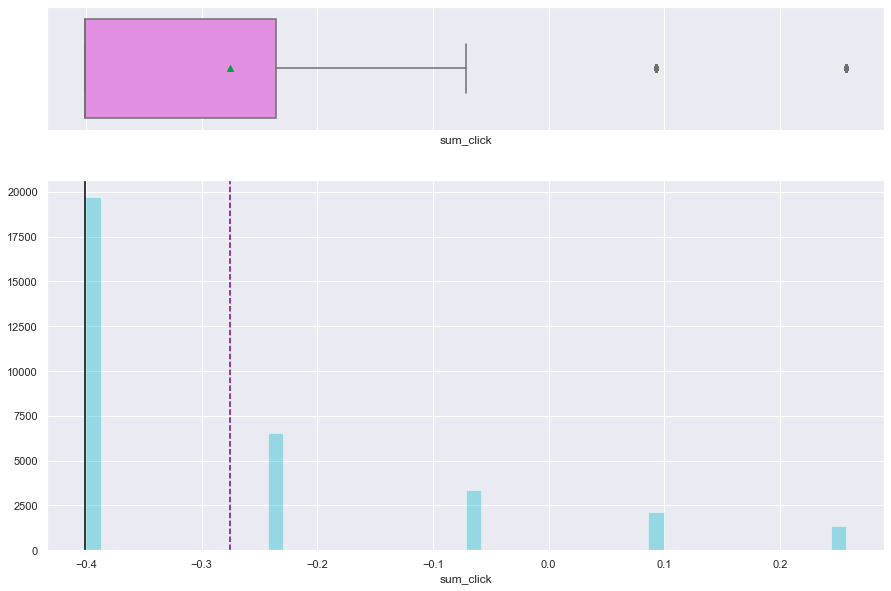

In [20]:
histogram_boxplot(ohdf['sum_click'])

The output for "Score" (the actual assessment score) showed six outliers on the left and a left skewed distribution.

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


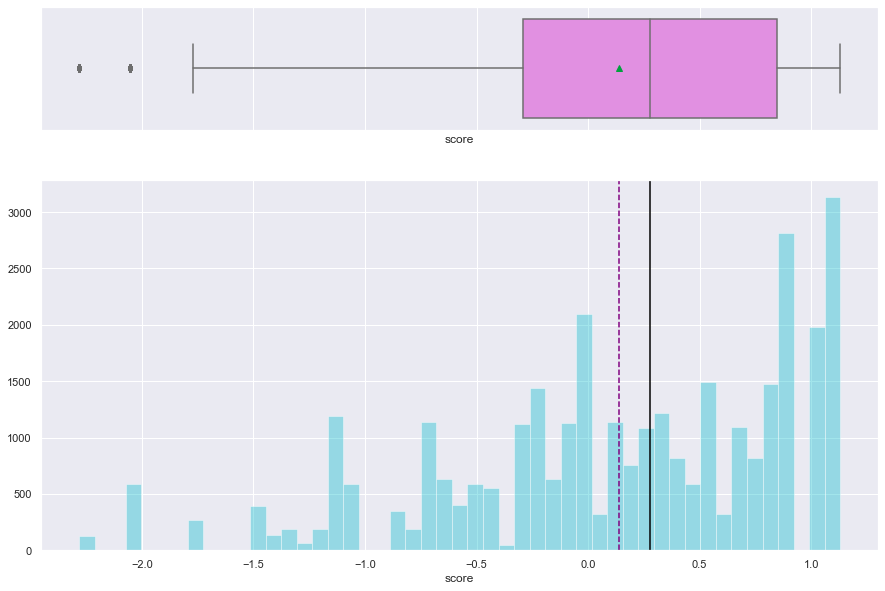

In [21]:
histogram_boxplot(ohdf['score'])

The box plot for "Weight" (calculated weights of the assessments) showed no outliers, and the distribution was scattered.

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


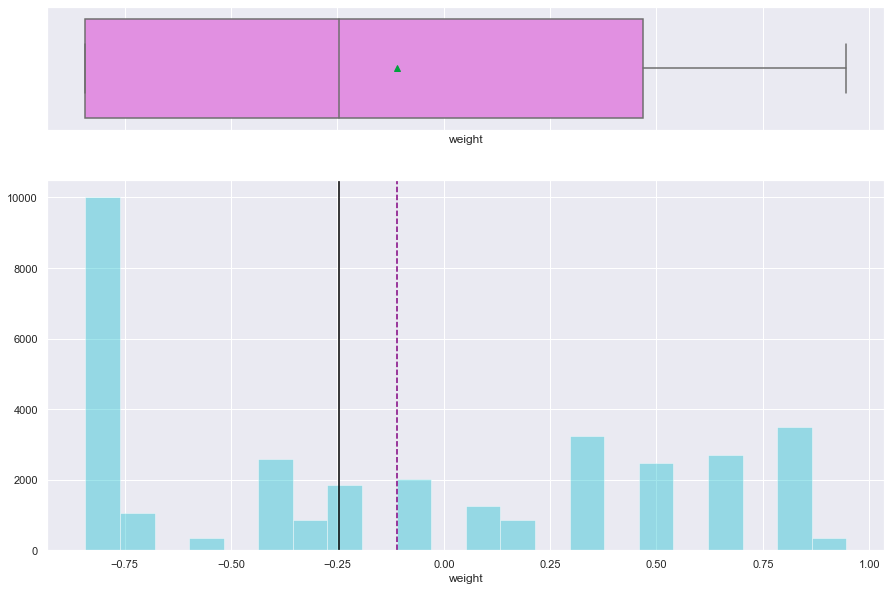

In [22]:
histogram_boxplot(ohdf['weight'])

The box plot for "Date_Registration" (the number of days relative to the start of a course that a student registers for the course) indicated that the majority of students registered a few days before the course began, while the only outliers in the data were those students who registered more than 20 days before the course began.

/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


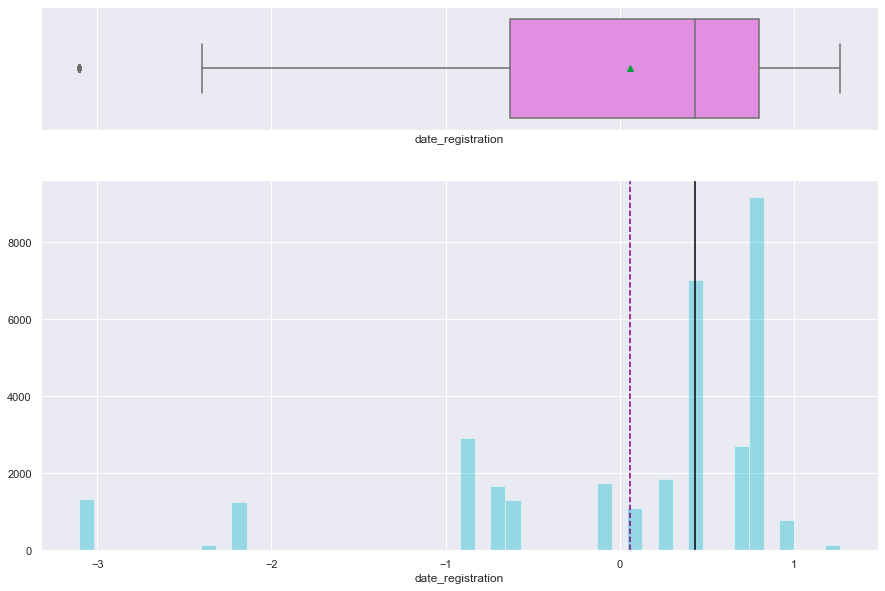

In [23]:
histogram_boxplot(ohdf['date_registration'])

# Modeling and Evaluation 1 #
*Train and adjust parameters*

In [24]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# y = OneHotDF['final_result_Pass']
# X = OneHotDF[['num_of_prev_attempts','studied_credits','disability_N']]
# cv = StratifiedKFold(n_splits=10)
# # run at n =100
# clf = RandomForestClassifier(n_estimators=2,random_state= randomState)

# acc = cross_val_score(clf,X,y=y,cv=cv)

# print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

The following cell runs a K Means clustering model using the **Number of Previous Attempts** and the **Final Result** variables

In [27]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Creating list of variables to create clusters with
clusterVars = ['num_of_prev_attempts_0', 'num_of_prev_attempts_1', 'num_of_prev_attempts_2', 'final_result_Pass']

X1 = OneHotDF[clusterVars]
#X1 = OneHotDF
nClusters = 4
cls = KMeans(n_clusters=nClusters, init='k-means++',random_state=randomState)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

# y = OneHotDF['Survived']
# X = OneHotDF[['Age','IsMale','Parch','SibSp']]
# X = np.column_stack((X,pd.get_dummies(newfeature)))
# acc = cross_val_score(cls,X,y=y,cv=cv)
# print ("Average accuracy (with kmeans for class/fare)= ", acc.mean()*100, "+-", acc.std()*100)

experimenting with model below

In [28]:
# Creating list of variables to create clusters with
clusterVars = ['num_of_prev_attempts', 'final_result_Pass']

#X1 = OneHotDF[clusterVars]
X1 = OneHotDF
nClusters = 4
cls = KMeans(n_clusters=nClusters, init='k-means++',random_state=randomState)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering



In [30]:
#emp & al stuff
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

y = ohdf['final_result_Pass']
X = ohdf[['num_of_prev_attempts_0','num_of_prev_attempts_1','num_of_prev_attempts_2','score', 'age_band_0-35']]
cv = StratifiedKFold(n_splits=10)
# run at n =100
clf = RandomForestClassifier(n_estimators=2,random_state= randomState)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  87.50128981468718 +- 16.336725383516633


In [31]:
ohdf.corr()

,date_x,sum_click,date_submitted,score,date_y,weight,date_registration,gender_F,gender_M,region_East Anglian Region,...,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA,module_presentation_length_234,module_presentation_length_240,module_presentation_length_241,module_presentation_length_261,module_presentation_length_262,module_presentation_length_268,module_presentation_length_269
date_x,1.000000,-0.009345,0.031197,0.052868,0.018345,-0.025704,-0.028392,0.021930,-0.021930,-0.104339,...,0.032942,NaN,-0.032942,0.102310,-0.071690,0.023921,0.013591,-0.088469,-0.061916,0.046959
sum_click,-0.009345,1.000000,-0.019919,-0.018956,-0.035698,0.072466,-0.014291,-0.055158,0.055158,-0.015322,...,-0.068486,NaN,0.068486,-0.051782,-0.002166,-0.015073,0.036647,-0.015218,-0.012018,0.019716
date_submitted,0.031197,-0.019919,1.000000,0.052889,0.828062,0.053883,0.029743,0.119321,-0.119321,-0.101542,...,0.234278,NaN,-0.234278,0.012858,-0.088597,0.096959,-0.020449,-0.081084,0.010110,-0.004139
score,0.052868,-0.018956,0.052889,1.000000,0.145904,-0.176167,-0.085398,0.056854,-0.056854,-0.059969,...,0.265686,NaN,-0.265686,0.187730,-0.105917,-0.005142,-0.013214,-0.033614,-0.209652,0.173229
date_y,0.018345,-0.035698,0.828062,0.145904,1.000000,-0.218078,0.069194,0.127866,-0.127866,-0.139394,...,0.488868,NaN,-0.488868,-0.041428,-0.089653,0.182385,-0.071776,-0.119823,0.201305,-0.158660
weight,-0.025704,0.072466,0.053883,-0.176167,-0.218078,1.000000,-0.025751,-0.441976,0.441976,0.089579,...,-0.750429,NaN,0.750429,-0.215224,-0.045262,-0.352733,0.036741,0.104398,0.015793,0.205886
date_registration,-0.028392,-0.014291,0.029743,-0.085398,0.069194,-0.025751,1.000000,-0.146208,0.146208,0.180600,...,0.031808,NaN,-0.031808,-0.449771,0.076315,-0.086860,-0.246582,0.165853,-0.123592,0.464583
gender_F,0.021930,-0.055158,0.119321,0.056854,0.127866,-0.441976,-0.146208,1.000000,-1.000000,0.450978,...,0.219457,NaN,-0.219457,0.350566,0.109753,0.502256,-0.046181,0.435675,-0.376097,-0.265659
gender_M,-0.021930,0.055158,-0.119321,-0.056854,-0.127866,0.441976,0.146208,-1.000000,1.000000,-0.450978,...,-0.219457,NaN,0.219457,-0.350566,-0.109753,-0.502256,0.046181,-0.435675,0.376097,0.265659
region_East Anglian Region,-0.104339,-0.015322,-0.101542,-0.059969,-0.139394,0.089579,0.180600,0.450978,-0.450978,1.000000,...,-0.175268,NaN,0.175268,-0.050988,0.243367,-0.078220,-0.119838,0.966066,-0.169612,-0.179949


# Modeling and Evaluation 2	#
*Evaluate and Compare*

The following cells use the silhouette score to calculat goodness in an attempt to find the optinmal number of clusters

In [32]:
sc = RobustScaler()

In [33]:
data_clust = sc.fit_transform(ohdf)
data_clust.shape

(33076, 56)

K = 3, Goodness = 0.18994783823084627
K = 5, Goodness = 0.22887485131552018
K = 7, Goodness = 0.2863480810923528
K = 9, Goodness = 0.32369039783384723
K = 11, Goodness = 0.31722678395329773
K = 13, Goodness = 0.3638534390692663
K = 15, Goodness = 0.3336935207421443
K = 17, Goodness = 0.3553480915854042
K = 19, Goodness = 0.387028530301772
K = 21, Goodness = 0.3931835634354017
K = 23, Goodness = 0.38698101809910346
K = 25, Goodness = 0.3853549988881508
K = 27, Goodness = 0.372182423433656
K = 29, Goodness = 0.39430648790920003
K = 31, Goodness = 0.3683105889569897
K = 33, Goodness = 0.3641896267076394
K = 35, Goodness = 0.4047783003359901
K = 37, Goodness = 0.38138541425755146
K = 39, Goodness = 0.38256144185169066
K = 41, Goodness = 0.37732785314206757
K = 43, Goodness = 0.3841419082477111
K = 45, Goodness = 0.4026077898338272
K = 47, Goodness = 0.3860177883646613
CPU times: user 7min 57s, sys: 2min 48s, total: 10min 45s
Wall time: 4min 44s


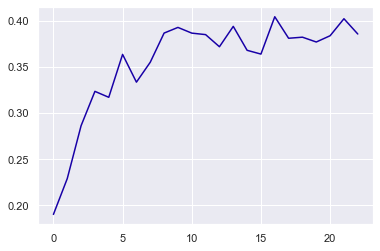

In [34]:
%%time
nclust = 49
cluster_goodness = []

for n in range(3,nclust,2):
    model = KMeans(n_clusters=n,random_state=randomState, init='k-means++')
    model.fit(data_clust)
    clusterLabels = model.labels_
    goodness = silhouette_score(X=data_clust, labels=clusterLabels)
    cluster_goodness.append([(n),goodness])
    print("K = {0}, Goodness = {1}".format(n, goodness))
    
cluster_goodness = pd.DataFrame.from_records(data = cluster_goodness,
                                            columns = ["n", "goodness"])
plt.plot(cluster_goodness.goodness)

K = 3, Goodness = 0.1502533621400425
K = 5, Goodness = 0.18880184935269104
K = 7, Goodness = 0.2353134213409216
K = 9, Goodness = 0.2550308990704066
K = 11, Goodness = 0.277740416200568
K = 13, Goodness = 0.296375043493979
K = 15, Goodness = 0.3286030399816891
K = 17, Goodness = 0.34510228079511107
K = 19, Goodness = 0.3442407069869469
K = 21, Goodness = 0.3503037755577397
K = 23, Goodness = 0.3484563578765984
K = 25, Goodness = 0.3615484609494459
K = 27, Goodness = 0.3580326413635123
K = 29, Goodness = 0.36095923717195316
K = 31, Goodness = 0.3769547156657873
K = 33, Goodness = 0.36385328498057395
K = 35, Goodness = 0.35647466861248583
K = 37, Goodness = 0.3683722596856467
K = 39, Goodness = 0.3672249280183736
K = 41, Goodness = 0.3702824052099978
K = 43, Goodness = 0.3680247616491349
CPU times: user 11min 4s, sys: 3min 57s, total: 15min 2s
Wall time: 6min 39s


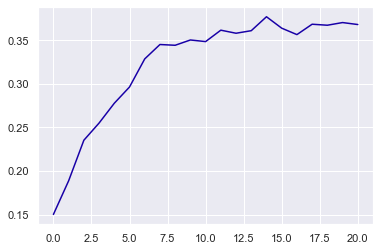

In [35]:
%%time
nclust = 45
cluster_goodness = []

for n in range(3,nclust,2):
    model = KMeans(n_clusters=n,random_state=randomState, init='k-means++')
    model.fit(OneHotDF)
    clusterLabels = model.labels_
    goodness = silhouette_score(X=OneHotDF, labels=clusterLabels)
    cluster_goodness.append([(n),goodness])
    print("K = {0}, Goodness = {1}".format(n, goodness))
    
cluster_goodness = pd.DataFrame.from_records(data = cluster_goodness,
                                            columns = ["n", "goodness"])
plt.plot(cluster_goodness.goodness)

Below im gonna play with the robust scaler on the OneHotDf to see if we get the same results

In [ ]:
%%time
#Declaring Scalar object
#scl_obj = StandardScaler()
scl_obj = RobustScaler()

#One hot encoding of ALL categorical variables
OneHotDF2 = pd.get_dummies(df[catCol],drop_first=False)

#Scaling non-encoded data
conVar = df.select_dtypes(exclude='object')
colnames = pd.Series(conVar.columns)
conVarScaled = scl_obj.fit_transform(conVar)
conVarScaled = pd.DataFrame(data = conVarScaled, columns= colnames)

#Combining with continuous variables from cleaned dataset
OneHotDF2 = OneHotDF2.reset_index()
OneHotDF2.pop('index')
OneHotDF2 = pd.concat([conVarScaled,OneHotDF2], axis = 1)
#OneHotDF2.head()

#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

# K Means Goodness loop
nclust = 50
cluster_goodness = []

for n in range(4,nclust,2):
    model = KMeans(n_clusters=n,random_state=randomState, init='k-means++')
    model.fit(OneHotDF2)
    clusterLabels = model.labels_
    goodness = silhouette_score(X=OneHotDF2, labels=clusterLabels)
    cluster_goodness.append([(n),goodness])
    print("K = {0}, Goodness = {1}".format(n, goodness))
    
cluster_goodness = pd.DataFrame.from_records(data = cluster_goodness,
                                            columns = ["n", "goodness"])
plt.plot(cluster_goodness.goodness)

K = 4, Goodness = 0.1519258075938281
K = 6, Goodness = 0.21208764547064107
K = 8, Goodness = 0.25349982931955983


The following cell produces value counts and visualizations of the clusters for the variables used to calculate the clusters. We can use these visualizations to verify that the clusters are calculated properly

In [ ]:
#Adding in cluster ID to dataframe to analyze
df2 = pd.DataFrame(df)
df2['cluster_ID'] = newfeature

# translating variables used to generate clusters to analyze clustering in initial non-OneHotEncoded dataset
checkVars = ['num_of_prev_attempts','final_result']

#For loop to iterate through clusters and generate value counts
for j in range(0,nClusters):
    dataFrame = df2[df2['cluster_ID']==j]
    print('Cluster', j + 1)
    for i in checkVars:
        # Numerical interpretation of clusters
        print(i,': \n',dataFrame[i].value_counts().sort_values(ascending=False),'\n')
        
        #Graph interpretation of clusters
        plt.hist(x = dataFrame[i].sort_values(ascending = False), label = 'cluster_ID')
        plt.title('Value Count Per Cluster for ' + i)
        plt.show()
    # Printing extra lines for visual separation between clusters
    print('\n\n\n')


# Modeling and Evaluation 3 #
*Visualize Results*

# Modeling and Evaluation 4 #
*Summarize the Ramifications*

# Deployment #
*Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*

# Exceptional Work #